<a href="https://colab.research.google.com/github/i7xmel/AML-Lab-2/blob/main/2348521_AML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Program_2_Dataset.csv')

In [4]:
data.head(5)

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [5]:
data.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [6]:
data.columns

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms ', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')

In [7]:
X = data[['Avg_rooms ','Distance', 'Property_TaxRate', 'Non_Retail_Acres']].values
Y = data['MValue'].values

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = ['Avg_rooms ', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif_data)


           Variable        VIF
0        Avg_rooms   16.747965
1          Distance   6.880607
2  Property_TaxRate  13.861510
3  Non_Retail_Acres   9.598374


In [9]:
#Avgrooms and Property_TaxRate have very high vif value suggesting high mutlicolinearity therefore it is dropped
X_reduced = data[['Distance','Non_Retail_Acres']].values
vif_reduced = pd.DataFrame()
vif_reduced["Variable"] = ['Distance','Non_Retail_Acres']
vif_reduced["VIF"] = [variance_inflation_factor(X_reduced, i) for i in range(X_reduced.shape[1])]

print(vif_reduced)


           Variable       VIF
0          Distance  1.468836
1  Non_Retail_Acres  1.468836


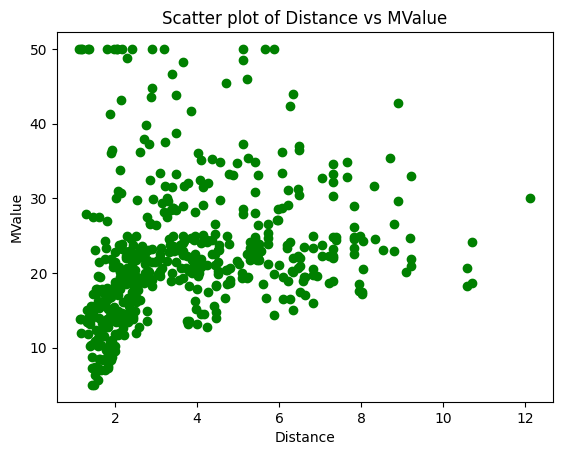

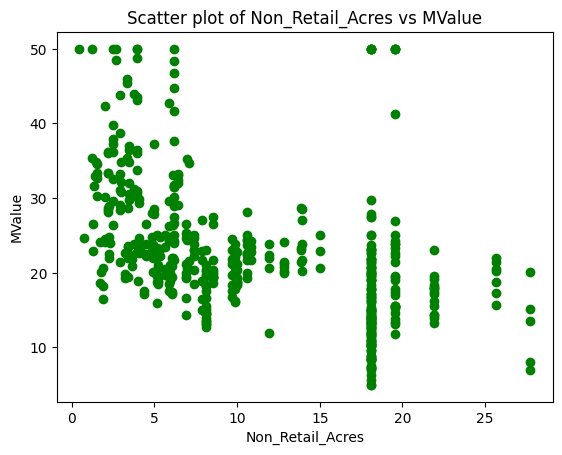

In [15]:
# Visualize association of each predictor with the target column using scatter plots
for predictor in ['Distance','Non_Retail_Acres']:
    plt.scatter(data[predictor], data['MValue'], c='green')
    plt.title(f'Scatter plot of {predictor} vs MValue')
    plt.xlabel(predictor)
    plt.ylabel('MValue')
    plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.33, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (339, 2)
X_test shape: (167, 2)
Y_train shape: (339,)
Y_test shape: (167,)


In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_reduced, Y)

print("Intercept:",model.intercept_,'\nCoefficeints',model.coef_)

Intercept: 34.79348224149389 
Coefficeints [-0.81067459 -0.82466677]


In [13]:
# Train set mse, r2,a nd adjusted printing
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

# Make predictions on the train data
Y_train_pred = model.predict(X_train)

r2_train = r2_score(Y_train, Y_train_pred)
n_train=len(Y_train)
k_train =2
adj_r2_train = ((1 - r2_train) * (n_train - 1) / (n_train - k_train - 1))

mse_train = mean_squared_error(Y_train, Y_train_pred)

# Print train metrics
print("Train Mean Squared Error (MSE):", mse_train)
print("Train R-squared (R2):", r2_train)
print("Train Adjusted R-squared:", adj_r2_train)

Train Mean Squared Error (MSE): 68.21523859487003
Train R-squared (R2): 0.25225911155470493
Train Adjusted R-squared: 0.7521917270669933


In [14]:
# Test set mse, r2,a nd adjusted printing
# Make predictions on the test data
Y_test_pred = model.predict(X_test)

# Calculate R-squared and adjusted R-squared for the test data
r2_test = r2_score(Y_test, Y_test_pred)
n_test=len(Y_test)
k_test =2
adj_r2_test = ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))

# Calculate mean squared error for the test data
mse_test = mean_squared_error(Y_test, Y_test_pred)

# Print test metrics
print("\nTest Mean Squared Error (MSE):", mse_test)
print("Test R-squared (R2):", r2_test)
print("Test Adjusted R-squared:", adj_r2_test)


Test Mean Squared Error (MSE): 53.06749884487855
Test R-squared (R2): 0.245104860182497
Test Adjusted R-squared: 0.7641011781079603
